## Лабораторная работа № 4

### Задание № 1

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Алгоритм

openFile = np.loadtxt("data.csv")

Table = np.zeros((10, 11), dtype = float)
for i in range(10):
    for j in range(2):
        Table[i][j] = openFile[i + 220][j]
        
for j in range(2, 11):
    for i in range(10):
        if (i + 1 < 10) and (Table[i + 1][j - 1] != 0):
            Table[i][j] = Table[i + 1][j - 1] - Table[i][j - 1]

In [3]:
# В выводимой таблице первый столбик - значения x;
# Второй столбик - значения f(x);
# Остальные - конечные разность различных порядков.

np.set_printoptions(suppress = True, precision = 6, linewidth = 200)
print (Table)

[[ 23.        -0.00046    0.310004  -0.028465  -0.027833   0.005355   0.00225   -0.000749  -0.000121   0.000021   0.000141]
 [ 23.1        0.309544   0.281539  -0.056298  -0.022478   0.007605   0.001501  -0.00087   -0.0001     0.000162   0.      ]
 [ 23.2        0.591083   0.225241  -0.078776  -0.014873   0.009106   0.000631  -0.00097    0.000062   0.         0.      ]
 [ 23.3        0.816324   0.146465  -0.093649  -0.005767   0.009737  -0.000339  -0.000908   0.         0.         0.      ]
 [ 23.4        0.962789   0.052816  -0.099416   0.00397    0.009398  -0.001247   0.         0.         0.         0.      ]
 [ 23.5        1.015605  -0.0466    -0.095446   0.013368   0.008151   0.         0.         0.         0.         0.      ]
 [ 23.6        0.969005  -0.142046  -0.082078   0.021519   0.         0.         0.         0.         0.         0.      ]
 [ 23.7        0.826959  -0.224124  -0.060559   0.         0.         0.         0.         0.         0.         0.      ]
 [ 23.8 

### Задание № 2

In [4]:
from math import factorial

In [13]:
xArr = np.zeros((10), dtype = float)
yArr = np.zeros((10), dtype = float)
yArr0 = np.zeros((10), dtype = float)
yArrN = np.zeros((10), dtype = float)
for i in range(10):
    xArr[i] = Table[i][0]
    yArr[i] = Table[i][1]
    yArr0[i] = Table[0][i + 1]
    yArrN[i] = Table[-1 - i][i + 1]
    
print (xArr)
print (yArr)
print (yArr0)
print (yArrN)

[ 23.   23.1  23.2  23.3  23.4  23.5  23.6  23.7  23.8  23.9]
[-0.00046   0.309544  0.591083  0.816324  0.962789  1.015605  0.969005  0.826959  0.602835  0.318152]
[-0.00046   0.310004 -0.028465 -0.027833  0.005355  0.00225  -0.000749 -0.000121  0.000021  0.000141]
[ 0.318152 -0.284683 -0.060559  0.021519  0.008151 -0.001247 -0.000908  0.000062  0.000162  0.000141]


In [14]:
def calcQ(mode, xArr):
    x = sp.symbols('x')
    if mode == True:
        q = (x - xArr[0]) / 0.1
        return q
    else:
        q = (x - xArr[9]) / 0.1
        return q

In [15]:
def calcCoef(mode, power, xArr):
    coef = 1
    q = calcQ(mode, xArr)
    if mode == True:
        for i in range(power):
            coef *= (q - i) / (i + 1)
    else:
        for i in range(power):
            coef *= (q + i) / (i + 1)
    return coef

In [43]:
def calcNewtown(mode, power, xArr, yArr):
    polinom = yArr[0]
    for j in range(1, power + 1):
        polinom += yArr[j] * calcCoef(mode, j, xArr)
    return polinom

In [44]:
x = sp.symbols('x')

new_xArr = np.zeros((1400), dtype = float)
new_xArr[0] = xArr[0] - 0.2
for i in range(1, 1400):
    new_xArr[i] = xArr[0] + i * 0.001

NewtownForw = calcNewtown(True, 2, xArr, yArr0)
NewtownBack = calcNewtown(False, 2, xArr, yArrN)

NewtownForwArr = np.zeros((1400), dtype = float)
NewtownBackArr = np.zeros((1400), dtype = float)
for i in range(1400):
    NewtownForwArr[i] = NewtownForw.subs(x, new_xArr[i])
    NewtownBackArr[i] = NewtownBack.subs(x, new_xArr[i])

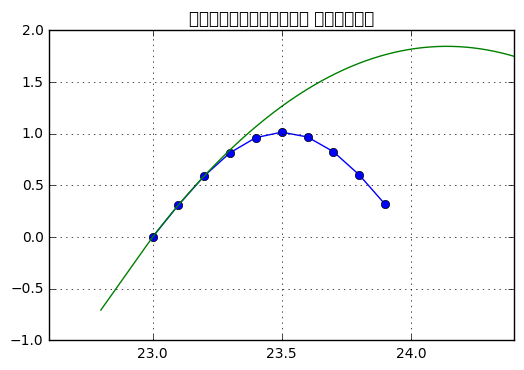

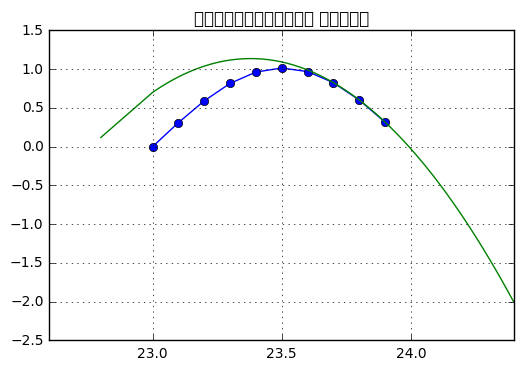

In [45]:
fig0 = plt.figure()
plt.title('Интерполяция вперёд')
axes0 = fig0.add_subplot(111)
axes0.grid()
axes0.plot(xArr, yArr, 'o-', new_xArr, NewtownForwArr)

fig1 = plt.figure()
plt.title('Интерполяция назад')
axes1 = fig1.add_subplot(111)
axes1.grid()
axes1.plot(xArr, yArr, 'o-', new_xArr, NewtownBackArr)

plt.show()